In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
p_info = pd.read_csv('participants_data.csv')

In [3]:
summary = pd.DataFrame()
for pid in p_info['pid']:
    filename = 'result/' + pid + '_fatigue.csv'
    if os.path.exists(filename) == False:
        continue
    data = pd.read_csv(filename, index_col=0)
    
    summary = pd.concat([summary, data])

In [4]:
data = summary.groupby(['pid', 'condition', 'day', 'block'], sort=None, as_index=False).mean()

In [5]:
data['timing'] = data['day'] + '_block' + [str(n) for n in data['block'].values]

In [6]:
data.columns

Index(['pid', 'condition', 'day', 'block', 'fatigue', 'concentrate',
       'difficulty', 'prediction', 'timing'],
      dtype='object')

C:\Users\OKAMOTO_LAB\Anaconda3\Lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


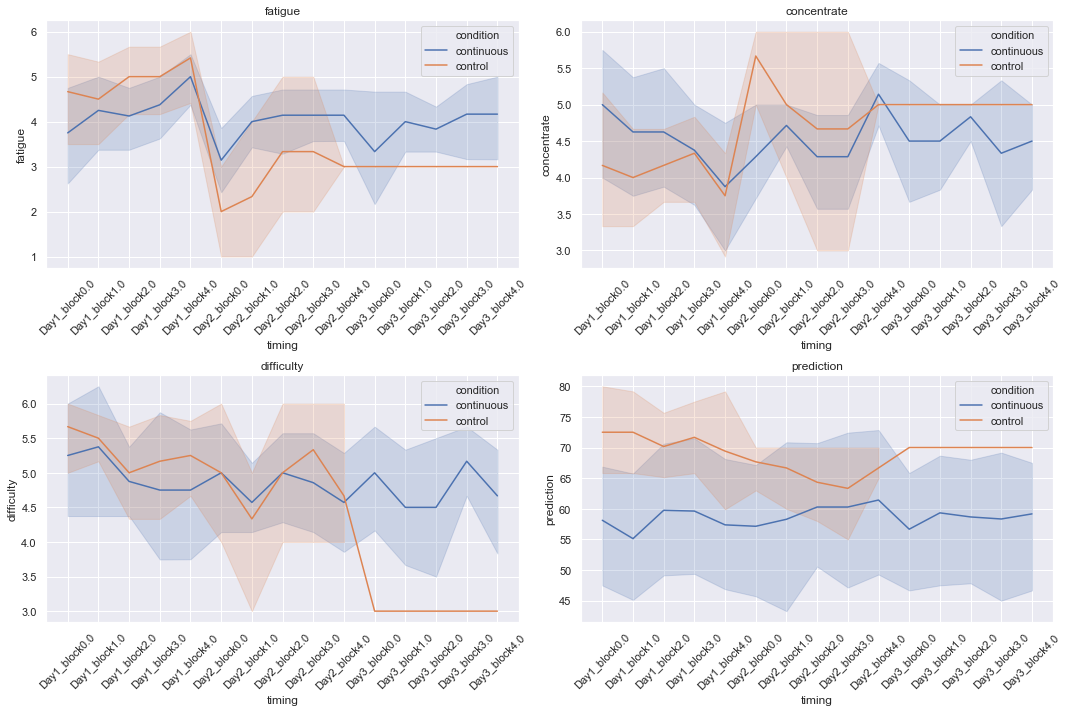

In [8]:
plt.figure(figsize=(15, 10))
for i, value in enumerate(['fatigue', 'concentrate', 'difficulty', 'prediction']):
    plt.subplot(2, 2, i+1)
    sns.lineplot(x='timing', y=value, hue='condition', data=data)
    plt.title(value)
    plt.xticks(rotation=45)
plt.tight_layout()